In [70]:
import torch
from rassp import netutil
from rassp.msutil.masscompute import FragmentFormulaPeakEnumerator

from rdkit import Chem
import matchms
import pandas as pd
import numpy as np

import matchms
from matchms.plotting import plot_spectra_mirror

import matplotlib.pyplot as plt


In [2]:
valid_atoms = {1, 5, 6, 7, 8, 9, 14, 15, 16, 17, 35, 53}
num_peaks_per_formula = 12
max_formulae = 100000

ffe = FragmentFormulaPeakEnumerator(sorted(valid_atoms), use_highres=True, max_peak_num=num_peaks_per_formula)

def goodmol(mol):
        if len(mol.GetAtoms()) > 48:
            return False
        
        atoms = { a.GetAtomicNum() for a in mol.GetAtoms() }
        if not atoms < valid_atoms:
            return False
            
        f,m = ffe.get_frag_formulae(mol)
        if len(f) > max_formulae:
            return False

        return True


In [4]:
test = pd.read_parquet('test.pq')

In [17]:
def molsize(mols):
    out = []
    for m in mols:
        mm = Chem.AddHs(Chem.Mol(m))
        out.append(len(mm.GetAtoms()))
    return pd.Series(out,name='atoms')

In [30]:
stest = test.sort_values('rdmol',key=molsize)
stest

,rdmol,spect,smiles
16,b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\x...,"[[12.0, 46.96], [16.0, 16.98], [28.0, 999.0], ...",[C-]#[O+]
19,b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\x...,"[[14.0, 136.88], [28.0, 999.0], [29.0, 6.99]]",N#N
28,b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\x...,"[[14.0, 108.9], [16.0, 24.98], [30.0, 999.0], ...",[N]=O
1176,b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\x...,"[[79.0, 449.59], [80.0, 999.0], [81.0, 438.6],...",Br
27029,b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\x...,"[[26.0, 1.0], [27.0, 1.0], [28.0, 1.0], [29.0,...",[H+].[Br-]
...,...,...,...
6754,b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\x...,"[[14.0, 10.99], [15.0, 167.85], [16.0, 8.99], ...",CC(=O)C1CCCC1
6755,b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\x...,"[[12.0, 1.0], [13.0, 1.0], [14.0, 10.99], [15....",CC1CCC(=O)CC1
6761,b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\x...,"[[14.0, 4.0], [15.0, 17.98], [17.0, 4.0], [18....",CC1CCCCC1=O
6726,b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\x...,"[[13.0, 6.99], [14.0, 31.97], [15.0, 131.88], ...",C1CC1C(C2CC2)O


In [31]:
stest = stest.iloc[range(0,len(stest),10)]
stest

,rdmol,spect,smiles
16,b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\x...,"[[12.0, 46.96], [16.0, 16.98], [28.0, 999.0], ...",[C-]#[O+]
146,b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\x...,"[[14.0, 193.83], [15.0, 104.91], [19.0, 68.94]...",N(F)F
18115,b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\x...,"[[12.0, 4.0], [35.0, 104.91], [37.0, 35.97], [...",C(Cl)(Cl)(Cl)Cl
3,b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\x...,"[[12.0, 25.98], [13.0, 85.92], [14.0, 170.85],...",C
15227,b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\x...,"[[12.0, 58.95], [13.0, 1.0], [14.0, 5.0], [23....",C(#N)C(Cl)(Cl)Cl
...,...,...,...
6808,b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\x...,"[[37.0, 3.0], [38.0, 7.99], [39.0, 164.85], [4...",CC1CCC(C1=O)C
28637,b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\x...,"[[10.0, 3.0], [15.0, 2.0], [22.0, 1.0], [26.0,...",CCCCC[Si](Cl)(Cl)Cl
12124,b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\x...,"[[14.0, 5.0], [15.0, 44.96], [16.0, 4.0], [17....",CC(C(=O)N)(OC)OC
6728,b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\x...,"[[38.0, 49.95], [39.0, 819.26], [40.0, 194.82]...",C=C1CCCCC1O


In [32]:
use_gpu=True
model='zia5/test.79149399.00000000.model'
meta='zia5/test.79149399.meta'

if use_gpu and not torch.cuda.is_available():
    use_gpu = False

predictor = netutil.PredModel(
    meta,
    model,
    USE_CUDA=use_gpu,
    data_parallel=False,
)


In [33]:
valid_mols = [ Chem.AddHs(Chem.Mol(m)) for m in stest.rdmol ]

In [34]:
predictions = predictor.pred(
    valid_mols,
    progress_bar=True,
    normalize_pred=True,
    output_hist_bins=True,
    batch_size=1, # XXX
    dataloader_config={
        'pin_memory': False,
        'num_workers': 0, # XXX
        'persistent_workers': False,
    },
    benchmark_dataloader=False,
)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 717/717 [03:01<00:00, 3.96it/s]


In [52]:
pred = predictions['pred_binned']

In [53]:
true = [ np.stack(list(t)) for t in stest.spect ]
len(true)

717

In [66]:
def to_matchms_spec(s):
    return matchms.Spectrum(mz=s[:,0].astype(float),intensities=s[:,1].astype(float))

2023-03-27 18:50:58,297:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 18:50:58,297 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 18:50:58,299:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 18:50:58,299 - matchms - WARNING - No precursor_mz found in metadata.


<Axes: title={'center': 'Spectrum comparison'}, xlabel='m/z', ylabel='Intensity'>

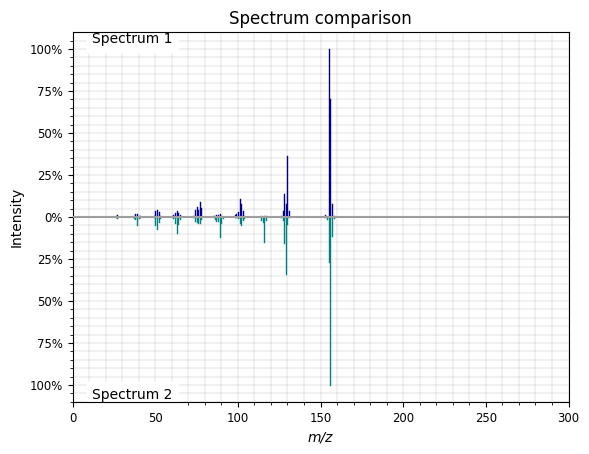

In [67]:
i=716
st = to_matchms_spec(true[i])
sp = to_matchms_spec(pred[i])
plot_spectra_mirror(st,sp)

In [99]:
sim = matchms.similarity.CosineGreedy()

scores = [ sim.pair(to_matchms_spec(true[i]),to_matchms_spec(pred[i])) for i in range(len(true)) ]

2023-03-27 19:06:10,327:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,327 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,328:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,328 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,329:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,329 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,330:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,330 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,331:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,331 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,331:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,331 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,332:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,332 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,333:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,333 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,333:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,333 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,334:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,334 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,335:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,335 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,335:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,335 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,337:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,337 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,337:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,337 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,338:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,338 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,338:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,338 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,339:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,339 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,339:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,339 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,341:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,341 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,341:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,341 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,342:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,342 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,343:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,343 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,344:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,344 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,344:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,344 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,345:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,345 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,346:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,346 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,347:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,347 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,347:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,347 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,348:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,348 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,349:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,349 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,350:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,350 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,350:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,350 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,351:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,351 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,351:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,351 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,352:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,352 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,353:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,353 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,354:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,354 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,354:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,354 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,355:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,355 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,356:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,356 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,357:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,357 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,357:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,357 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,358:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,358 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,358:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,358 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,359:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,359 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,360:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,360 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,361:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,361 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,361:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,361 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,362:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,362 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,362:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,362 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,364:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,364 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,364:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,364 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,365:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,365 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,366:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,366 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,366:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,366 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,367:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,367 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,368:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,368 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,368:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,368 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,369:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,369 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,369:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,369 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,370:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,370 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,371:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,371 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,372:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,372 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,373:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,373 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,374:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,374 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,374:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,374 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,375:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,375 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,375:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,375 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,376:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,376 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,376:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,376 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,378:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,378 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,378:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,378 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,379:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,379 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,380:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,380 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,381:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,381 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,381:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,381 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,382:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,382 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,382:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,382 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,384:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,384 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,384:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,384 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,385:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,385 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,385:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,385 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,387:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,387 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,387:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,387 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,388:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,388 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,388:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,388 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,389:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,389 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,390:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,390 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,390:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,390 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,391:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,391 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,391:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,391 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,393:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,393 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,394:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,394 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,394:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,394 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,395:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,395 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,396:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,396 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,396:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,396 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,397:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,397 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,398:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,398 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,398:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,398 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,399:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,399 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,400:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,400 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,400:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,400 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,401:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,401 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,401:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,401 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,402:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,402 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,402:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,402 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,403:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,403 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,405:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,405 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,406:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,406 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,406:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,406 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,407:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,407 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,408:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,408 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,409:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,409 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,409:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,409 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,410:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,410 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,410:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,410 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,411:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,411 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,412:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,412 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,413:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,413 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,414:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,414 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,414:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,414 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,415:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,415 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,416:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,416 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,417:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,417 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,417:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,417 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,418:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,418 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,419:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,419 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,420:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,420 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,421:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,421 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,422:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,422 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,422:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,422 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,423:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,423 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,423:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,423 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,425:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,425 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,425:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,425 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,426:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,426 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,427:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,427 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,427:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,427 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,428:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,428 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,429:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,429 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,429:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,429 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,430:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,430 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,431:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,431 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,432:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,432 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,432:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,432 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,433:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,433 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,433:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,433 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,435:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,435 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,435:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,435 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,436:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,436 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,437:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,437 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,437:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,437 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,438:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,438 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,439:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,439 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,439:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,439 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,440:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,440 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,440:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,440 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,442:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,442 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,442:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,442 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,443:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,443 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,444:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,444 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,445:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,445 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,445:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,445 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,446:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,446 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,447:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,447 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,448:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,448 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,448:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,448 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,449:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,449 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,450:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,450 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,451:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,451 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,451:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,451 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,452:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,452 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,453:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,453 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,453:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,453 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,454:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,454 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,455:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,455 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,456:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,456 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,456:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,456 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,642:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,642 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,644:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,644 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,644:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,644 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,645:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,645 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,645:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,645 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,646:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,646 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,646:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,646 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,647:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,647 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,647:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,647 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,648:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,648 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,649:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,649 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,649:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,649 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,649:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,649 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,650:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,650 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,650:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,650 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,651:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,651 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,651:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,651 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,652:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,652 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,652:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,652 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,653:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,653 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,653:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,653 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,654:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,654 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,654:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,654 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,655:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,655 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,655:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,655 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,656:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,656 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,656:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,656 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,657:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,657 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,657:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,657 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,658:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,658 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,658:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,658 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,659:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,659 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,659:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,659 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,660:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,660 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,660:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,660 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,661:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,661 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,661:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,661 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,662:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,662 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,662:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,662 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,662:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,662 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,663:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,663 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,664:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,664 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,664:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,664 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,664:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,664 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,665:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,665 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,665:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,665 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,666:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,666 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,666:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,666 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,667:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,667 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,667:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,667 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,668:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,668 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,668:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,668 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,669:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,669 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,669:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,669 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,670:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,670 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,670:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,670 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,671:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,671 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,671:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,671 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,672:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,672 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,672:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,672 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,672:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,672 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,673:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,673 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,673:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,673 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,674:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,674 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,674:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,674 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,675:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,675 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,675:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,675 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,676:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,676 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,676:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,676 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,677:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,677 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,677:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,677 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,678:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,678 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,678:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,678 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,679:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,679 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,679:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,679 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,680:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,680 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,680:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,680 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,681:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,681 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,681:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,681 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,682:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,682 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,682:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,682 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,682:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,682 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,683:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,683 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,683:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,683 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,684:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,684 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,684:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,684 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,685:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,685 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,685:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,685 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,686:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,686 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,686:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,686 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,687:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,687 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,687:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,687 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,688:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,688 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,688:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,688 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,689:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,689 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,689:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,689 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,689:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,689 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,690:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,690 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,691:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,691 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,691:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,691 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,692:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,692 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,692:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,692 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,693:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,693 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,693:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,693 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,693:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,693 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,694:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,694 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,694:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,694 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,695:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,695 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,695:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,695 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,696:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,696 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,696:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,696 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,697:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,697 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,697:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,697 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,698:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,698 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,698:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,698 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,699:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,699 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,699:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,699 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,700:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,700 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,700:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,700 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,701:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,701 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,701:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,701 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,702:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,702 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,702:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,702 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,703:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,703 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,703:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,703 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,704:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,704 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,704:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,704 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,705:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,705 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,705:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,705 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,706:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,706 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,706:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,706 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,706:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,706 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,707:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,707 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,707:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,707 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,708:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,708 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,708:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,708 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,709:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,709 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,709:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,709 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,710:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,710 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,710:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,710 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,710:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,710 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,711:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,711 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,712:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,712 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,712:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,712 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,712:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,712 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,713:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,713 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,713:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,713 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,714:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,714 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,714:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,714 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,715:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,715 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,715:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,715 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,716:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,716 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,716:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,716 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,717:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,717 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,717:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,717 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,718:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,718 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,718:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,718 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,719:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,719 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,719:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,719 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,720:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,720 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,720:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,720 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,721:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,721 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,721:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,721 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,722:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,722 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,722:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,722 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,723:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,723 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,723:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,723 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,723:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,723 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,724:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,724 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,724:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,724 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,725:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,725 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,725:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,725 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,726:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,726 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,726:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,726 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,727:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,727 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,727:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,727 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,728:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,728 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,728:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,728 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,729:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,729 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,729:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,729 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,730:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,730 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,730:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,730 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,731:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,731 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,731:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,731 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,732:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,732 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,732:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,732 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,732:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,732 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,733:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,733 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,733:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,733 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,734:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,734 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,734:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,734 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,735:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,735 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,735:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,735 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,736:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,736 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,736:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,736 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,737:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,737 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,737:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,737 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,738:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,738 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,738:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,738 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,739:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,739 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,739:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,739 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,740:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,740 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,740:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,740 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,741:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,741 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,741:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,741 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,741:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,741 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,742:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,742 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,743:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,743 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,743:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,743 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,743:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,743 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,744:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,744 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,744:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,744 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,745:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,745 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,745:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,745 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,746:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,746 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,746:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,746 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,747:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,747 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,747:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,747 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,748:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,748 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,748:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,748 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,749:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,749 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,749:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,749 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,749:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,749 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,750:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,750 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,750:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,750 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,751:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,751 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,751:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,751 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,752:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,752 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,752:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,752 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,753:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,753 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,753:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,753 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,754:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,754 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,754:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,754 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,755:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,755 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,755:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,755 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,756:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,756 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,756:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,756 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,757:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,757 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,757:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,757 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,758:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,758 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,758:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,758 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,759:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,759 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,759:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,759 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,760:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,760 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,760:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,760 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,761:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,761 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,761:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,761 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,761:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,761 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,762:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,762 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,762:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,762 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,763:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,763 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,763:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,763 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,764:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,764 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,764:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,764 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,765:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,765 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,765:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,765 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,766:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,766 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,766:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,766 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,767:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,767 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,767:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,767 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,768:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,768 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,768:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,768 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,769:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,769 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,769:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,769 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,769:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,769 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,770:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,770 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,770:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,770 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,771:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,771 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,771:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,771 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,772:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,772 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,772:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,772 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,773:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,773 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,773:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,773 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,774:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,774 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,774:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,774 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,775:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,775 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,775:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,775 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,776:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,776 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,776:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,776 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,777:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,777 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,777:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,777 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,777:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,777 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,778:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,778 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,779:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,779 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,779:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,779 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,780:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,780 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,780:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,780 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,781:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,781 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,781:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,781 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,781:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,781 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,782:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,782 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,782:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,782 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,783:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,783 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,783:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,783 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,784:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,784 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,784:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,784 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,785:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,785 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,785:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,785 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,786:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,786 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,786:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,786 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,787:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,787 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,787:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,787 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,788:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,788 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,788:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,788 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,789:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,789 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,789:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,789 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,790:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,790 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,790:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,790 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,790:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,790 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,791:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,791 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,791:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,791 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,792:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,792 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,792:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,792 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,793:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,793 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,793:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,793 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,794:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,794 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,794:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,794 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,795:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,795 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,795:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,795 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,796:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,796 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,796:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,796 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,797:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,797 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,797:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,797 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,798:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,798 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,798:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,798 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,799:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,799 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,799:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,799 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,800:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,800 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,800:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,800 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,801:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,801 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,801:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,801 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,802:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,802 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,802:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,802 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,803:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,803 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,803:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,803 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,804:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,804 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,804:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,804 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,805:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,805 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,805:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,805 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,806:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,806 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,806:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,806 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,807:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,807 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,807:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,807 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,808:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,808 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,808:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,808 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,808:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,808 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,809:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,809 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,809:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,809 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,810:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,810 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,810:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,810 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,811:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,811 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,811:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,811 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,812:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,812 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,812:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,812 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,813:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,813 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,813:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,813 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,814:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,814 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,814:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,814 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,815:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,815 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,815:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,815 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,816:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,816 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,816:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,816 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,817:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,817 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,817:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,817 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,818:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,818 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,818:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,818 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,819:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,819 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,819:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,819 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,820:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,820 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,820:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,820 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,821:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,821 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,821:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,821 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,821:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,821 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,822:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,822 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,822:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,822 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,823:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,823 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,823:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,823 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,824:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,824 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,824:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,824 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,825:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,825 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,825:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,825 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,826:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,826 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,826:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,826 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,827:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,827 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,827:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,827 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,828:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,828 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,828:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,828 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,829:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,829 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,829:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,829 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,830:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,830 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,830:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,830 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,831:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,831 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,831:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,831 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,832:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,832 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,832:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,832 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,833:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,833 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,833:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,833 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,834:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,834 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,834:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,834 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,835:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,835 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,835:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,835 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,836:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,836 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,836:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,836 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,837:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,837 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,837:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,837 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,837:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,837 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,838:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,838 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,838:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,838 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,839:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,839 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,839:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,839 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,840:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,840 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,840:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,840 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,841:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,841 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,841:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,841 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,842:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,842 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,842:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,842 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,843:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,843 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,843:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,843 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,843:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,843 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,844:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,844 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,844:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,844 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,845:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,845 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,845:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,845 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,846:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,846 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,846:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,846 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,847:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,847 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,847:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,847 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,848:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,848 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,848:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,848 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,849:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,849 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,849:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,849 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,850:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,850 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,850:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,850 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,850:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,850 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,851:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,851 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,852:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,852 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,852:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,852 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,853:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,853 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,853:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,853 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,853:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,853 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,854:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,854 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,854:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,854 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,855:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,855 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,855:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,855 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,856:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,856 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,856:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,856 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,857:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,857 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,857:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,857 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,858:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,858 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,858:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,858 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,859:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,859 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,859:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,859 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,859:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,859 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,860:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,860 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,860:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,860 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,861:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,861 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,861:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,861 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,862:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,862 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,862:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,862 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,863:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,863 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,863:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,863 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,864:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,864 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,864:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,864 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,865:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,865 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,865:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,865 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,866:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,866 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,866:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,866 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,867:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,867 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,867:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,867 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,868:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,868 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,868:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,868 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,869:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,869 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,869:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,869 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,870:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,870 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,870:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,870 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,870:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,870 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,871:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,871 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,872:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,872 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,872:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,872 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,873:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,873 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,873:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,873 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,873:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,873 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,874:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,874 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,874:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,874 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,875:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,875 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,875:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,875 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,876:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,876 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,876:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,876 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,877:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,877 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,877:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,877 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,878:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,878 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,878:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,878 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,879:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,879 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,879:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,879 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,880:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,880 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,880:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,880 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,881:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,881 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,881:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,881 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,882:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,882 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,882:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,882 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,883:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,883 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,883:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,883 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,884:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,884 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,884:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,884 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,884:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,884 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,885:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,885 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,885:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,885 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,886:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,886 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,886:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,886 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,887:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,887 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,887:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,887 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,888:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,888 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,888:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,888 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,889:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,889 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,889:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,889 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,890:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,890 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,890:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,890 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,891:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,891 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,891:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,891 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,892:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,892 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,892:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,892 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,893:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,893 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,893:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,893 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,894:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,894 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,894:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,894 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,895:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,895 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,895:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,895 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,896:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,896 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,896:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,896 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,897:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,897 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,897:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,897 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,897:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,897 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,898:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,898 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,899:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,899 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,899:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,899 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,899:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,899 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,900:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,900 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,900:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,900 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,901:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,901 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,901:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,901 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,902:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,902 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,902:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,902 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,903:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,903 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,903:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,903 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,904:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,904 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,904:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,904 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,905:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,905 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,905:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,905 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,906:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,906 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,906:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,906 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,907:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,907 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,907:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,907 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,908:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,908 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,908:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,908 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,909:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,909 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,909:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,909 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,909:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,909 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,910:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,910 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,910:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,910 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,911:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,911 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,911:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,911 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,912:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,912 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,912:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,912 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,913:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,913 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,913:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,913 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,914:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,914 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,914:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,914 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,915:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,915 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,915:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,915 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,916:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,916 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,916:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,916 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,917:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,917 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,917:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,917 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,918:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,918 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,918:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,918 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,919:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,919 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,919:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,919 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,919:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,919 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,920:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,920 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,921:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,921 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,921:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,921 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,922:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,922 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,922:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,922 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,922:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,922 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,923:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,923 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,924:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,924 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,924:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,924 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,924:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,924 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,925:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,925 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,925:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,925 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,926:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,926 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,926:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,926 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,927:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,927 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,927:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,927 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,928:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,928 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,928:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,928 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,929:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,929 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,929:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,929 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,930:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,930 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,930:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,930 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,931:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,931 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,931:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,931 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,932:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,932 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,932:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,932 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,933:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,933 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,933:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,933 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,933:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,933 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,934:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,934 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,935:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,935 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,935:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,935 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,935:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,935 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,936:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,936 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,936:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,936 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,937:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,937 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,937:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,937 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,938:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,938 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,938:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,938 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,939:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,939 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,939:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,939 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,940:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,940 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,940:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,940 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,941:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,941 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,941:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,941 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,942:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,942 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,942:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,942 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,943:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,943 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,943:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,943 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,944:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,944 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,944:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,944 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,945:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,945 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,945:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,945 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,946:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,946 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,946:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,946 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,947:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,947 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,947:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,947 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,948:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,948 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,948:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,948 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,949:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,949 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,949:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,949 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,950:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,950 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,950:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,950 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,951:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,951 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,951:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,951 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,952:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,952 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,952:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,952 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,953:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,953 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,953:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,953 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,954:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,954 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,954:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,954 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,955:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,955 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,955:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,955 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,956:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,956 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,956:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,956 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,957:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,957 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,957:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,957 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,958:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,958 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,958:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,958 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,958:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,958 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,959:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,959 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,959:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,959 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,960:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,960 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,960:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,960 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,961:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,961 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,961:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,961 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,962:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,962 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,962:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,962 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,963:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,963 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,963:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,963 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,964:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,964 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,964:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,964 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,965:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,965 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,965:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,965 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,966:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,966 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,966:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,966 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,967:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,967 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,967:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,967 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,968:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,968 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,968:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,968 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,969:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,969 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,969:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,969 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,970:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,970 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,970:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,970 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,971:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,971 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,971:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,971 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,971:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,971 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,972:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,972 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,972:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,972 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,973:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,973 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,973:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,973 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,974:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,974 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,974:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,974 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,975:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,975 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,975:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,975 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,976:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,976 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,976:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,976 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,977:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,977 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,977:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,977 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,978:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,978 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,978:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,978 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,979:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,979 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,979:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,979 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,980:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,980 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,980:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,980 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,981:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,981 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,981:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,981 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,982:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,982 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,982:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,982 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,983:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,983 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,983:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,983 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,984:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,984 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,984:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,984 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,985:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,985 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,985:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,985 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,986:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,986 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,986:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,986 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,987:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,987 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,987:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,987 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,988:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,988 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,988:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,988 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,989:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,989 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,989:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,989 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,990:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,990 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,990:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,990 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,991:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,991 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,991:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,991 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,992:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,992 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,992:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,992 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,993:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,993 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,993:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,993 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,994:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,994 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,994:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,994 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,995:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,995 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,995:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,995 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,996:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,996 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,996:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,996 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,997:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,997 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,997:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,997 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,998:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,998 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,998:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,998 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,999:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,999 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:10,999:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:10,999 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,000:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,000 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,000:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,000 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,000:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,000 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,001:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,001 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,001:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,001 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,002:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,002 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,002:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,002 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,003:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,003 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,003:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,003 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,004:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,004 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,004:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,004 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,005:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,005 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,005:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,005 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,006:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,006 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,006:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,006 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,007:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,007 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,007:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,007 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,008:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,008 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,008:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,008 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,009:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,009 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,009:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,009 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,010:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,010 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,010:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,010 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,011:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,011 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,011:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,011 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,012:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,012 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,012:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,012 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,013:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,013 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,013:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,013 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,013:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,013 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,014:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,014 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,014:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,014 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,015:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,015 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,015:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,015 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,016:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,016 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,016:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,016 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,017:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,017 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,017:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,017 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,018:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,018 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,018:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,018 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,019:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,019 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,019:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,019 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,020:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,020 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,020:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,020 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,021:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,021 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,021:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,021 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,022:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,022 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,022:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,022 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,023:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,023 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,023:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,023 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,024:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,024 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,024:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,024 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,025:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,025 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,025:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,025 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,026:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,026 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,026:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,026 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,026:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,026 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,027:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,027 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,027:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,027 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,028:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,028 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,028:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,028 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,029:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,029 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,029:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,029 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,030:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,030 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,030:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,030 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,031:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,031 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,031:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,031 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,032:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,032 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,032:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,032 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,033:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,033 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,033:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,033 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,033:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,033 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,034:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,034 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,035:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,035 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,035:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,035 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,036:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,036 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,036:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,036 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,037:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,037 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,037:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,037 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,038:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,038 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,038:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,038 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,038:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,038 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,039:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,039 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,039:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,039 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,040:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,040 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,040:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,040 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,041:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,041 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,041:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,041 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,042:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,042 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,042:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,042 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,043:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,043 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,043:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,043 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,044:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,044 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,044:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,044 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,045:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,045 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,045:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,045 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,046:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,046 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,046:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,046 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,047:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,047 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,047:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,047 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,048:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,048 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,048:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,048 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,049:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,049 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,049:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,049 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,050:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,050 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,050:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,050 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,051:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,051 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,051:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,051 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,052:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,052 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,052:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,052 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,053:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,053 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,053:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,053 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,054:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,054 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,054:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,054 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,055:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,055 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,055:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,055 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,056:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,056 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,056:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,056 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,057:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,057 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,057:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,057 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,057:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,057 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,058:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,058 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,058:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,058 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,059:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,059 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,059:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,059 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,060:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,060 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,060:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,060 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,061:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,061 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,061:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,061 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,062:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,062 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,062:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,062 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,063:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,063 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,063:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,063 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,064:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,064 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,064:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,064 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,065:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,065 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,065:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,065 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,066:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,066 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,066:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,066 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,067:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,067 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,067:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,067 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,068:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,068 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,068:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,068 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,069:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,069 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,069:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,069 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,070:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,070 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,070:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,070 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,071:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,071 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,071:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,071 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,072:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,072 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,072:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,072 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,073:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,073 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,073:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,073 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,073:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,073 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,074:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,074 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,074:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,074 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,075:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,075 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,075:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,075 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,076:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,076 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,076:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,076 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,077:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,077 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,077:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,077 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,078:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,078 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,078:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,078 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,079:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,079 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,079:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,079 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,080:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,080 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,080:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,080 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,081:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,081 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,081:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,081 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,082:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,082 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,082:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,082 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,083:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,083 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,083:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,083 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,084:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,084 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,084:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,084 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,085:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,085 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,085:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,085 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,086:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,086 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,086:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,086 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,087:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,087 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,087:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,087 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,088:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,088 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,088:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,088 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,089:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,089 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,089:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,089 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,090:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,090 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,090:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,090 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,091:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,091 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,091:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,091 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,092:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,092 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,092:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,092 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,093:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,093 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,093:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,093 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,094:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,094 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,094:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,094 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,095:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,095 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,095:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,095 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,096:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,096 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,096:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,096 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,097:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,097 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,097:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,097 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,098:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,098 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,098:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,098 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,099:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,099 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,099:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,099 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,100:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,100 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,100:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,100 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,101:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,101 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,101:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,101 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,102:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,102 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,102:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,102 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,102:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,102 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,103:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,103 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,103:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,103 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,104:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,104 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,104:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,104 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,105:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,105 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,105:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,105 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,106:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,106 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,106:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,106 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,107:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,107 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,107:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,107 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,108:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,108 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,108:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,108 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,109:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,109 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,109:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,109 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,110:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,110 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,110:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,110 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,111:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,111 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,111:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,111 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,112:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,112 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,112:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,112 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,113:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,113 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,113:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,113 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,114:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,114 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,114:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,114 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,114:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,114 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,115:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,115 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,115:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,115 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,116:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,116 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,117:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,117 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,117:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,117 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,117:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,117 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,118:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,118 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,118:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,118 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,119:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,119 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,119:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,119 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,119:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,119 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,120:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,120 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,121:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,121 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,121:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,121 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,122:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,122 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,122:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,122 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,123:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,123 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,123:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,123 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,124:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,124 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,124:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,124 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,125:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,125 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,125:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,125 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,125:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,125 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,126:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,126 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,126:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,126 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,127:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,127 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,128:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,128 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,128:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,128 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,129:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,129 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,129:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,129 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,129:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,129 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,130:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,130 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,130:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,130 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,131:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,131 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,131:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,131 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,132:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,132 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,133:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,133 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,133:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,133 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,134:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,134 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,134:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,134 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,135:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,135 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,135:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,135 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,136:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,136 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,136:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,136 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,137:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,137 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,137:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,137 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,138:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,138 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,138:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,138 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,139:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,139 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,139:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,139 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,140:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,140 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,140:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,140 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,141:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,141 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,141:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,141 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,142:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,142 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,142:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,142 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,143:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,143 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,143:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,143 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,144:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,144 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,144:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,144 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,145:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,145 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,145:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,145 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,146:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,146 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,146:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,146 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,147:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,147 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,147:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,147 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,148:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,148 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,148:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,148 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,149:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,149 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,149:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,149 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,150:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,150 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,150:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,150 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,151:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,151 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,151:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,151 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,152:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,152 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,152:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,152 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,153:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,153 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,153:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,153 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,154:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,154 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,154:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,154 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,155:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,155 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,155:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,155 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,156:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,156 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,156:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,156 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,157:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,157 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,157:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,157 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,158:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,158 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,158:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,158 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,159:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,159 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,159:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,159 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,160:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,160 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,160:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,160 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,161:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,161 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,161:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,161 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,162:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,162 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,162:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,162 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,163:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,163 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,163:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,163 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,164:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,164 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,164:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,164 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,165:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,165 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,165:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,165 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,166:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,166 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,166:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,166 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,167:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,167 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,167:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,167 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,168:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,168 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,168:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,168 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,169:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,169 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,169:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,169 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,169:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,169 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,170:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,170 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,171:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,171 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,171:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,171 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,172:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,172 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,172:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,172 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,172:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,172 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,173:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,173 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,173:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,173 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,174:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,174 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,174:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,174 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,175:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,175 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,175:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,175 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,176:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,176 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,176:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,176 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,177:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,177 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,177:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,177 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,178:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,178 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,178:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,178 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,179:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,179 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,179:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,179 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,180:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,180 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,180:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,180 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,181:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,181 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,181:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,181 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,182:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,182 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,182:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,182 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,183:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,183 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,183:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,183 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,184:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,184 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,184:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,184 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,185:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,185 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,185:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,185 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,186:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,186 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,186:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,186 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,187:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,187 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,187:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,187 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,188:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,188 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,188:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,188 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,188:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,188 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,189:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,189 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,189:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,189 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,190:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,190 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,190:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,190 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,191:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,191 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,191:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,191 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,192:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,192 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,192:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,192 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,193:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,193 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,193:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,193 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,194:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,194 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,194:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,194 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,195:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,195 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,195:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,195 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,196:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,196 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,196:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,196 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,197:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,197 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,197:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,197 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,198:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,198 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,198:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,198 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,199:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,199 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,199:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,199 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,200:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,200 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,200:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,200 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,201:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,201 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,201:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,201 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,202:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,202 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,202:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,202 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,203:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,203 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,203:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,203 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,203:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,203 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,204:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,204 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,205:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,205 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,205:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,205 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,206:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,206 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,206:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,206 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,207:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,207 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,207:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,207 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,208:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,208 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,208:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,208 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,209:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,209 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,209:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,209 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,209:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,209 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,210:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,210 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,210:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,210 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,211:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,211 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,211:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,211 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,212:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,212 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,212:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,212 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,213:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,213 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,213:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,213 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,214:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,214 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,214:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,214 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,215:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,215 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,215:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,215 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,216:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,216 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,216:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,216 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,217:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,217 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,217:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,217 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,218:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,218 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,218:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,218 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,219:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,219 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,219:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,219 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,219:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,219 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,220:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,220 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,220:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,220 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,221:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,221 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,221:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,221 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,222:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,222 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,222:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,222 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,223:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,223 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,223:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,223 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,224:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,224 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,224:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,224 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,225:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,225 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,225:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,225 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,226:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,226 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,226:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,226 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,227:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,227 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,227:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,227 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,228:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,228 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,228:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,228 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,229:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,229 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,229:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,229 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,230:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,230 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,230:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,230 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,231:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,231 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,231:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,231 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,232:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,232 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,232:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,232 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,233:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,233 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,233:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,233 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,234:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,234 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,234:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,234 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,234:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,234 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,235:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,235 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,236:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,236 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,236:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,236 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,236:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,236 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,237:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,237 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,237:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,237 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,238:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,238 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,238:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,238 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,239:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,239 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,239:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,239 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,240:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,240 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,240:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,240 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,241:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,241 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,241:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,241 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,242:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,242 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,242:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,242 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,243:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,243 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,243:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,243 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,244:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,244 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,244:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,244 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,245:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,245 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,245:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,245 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,246:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,246 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,246:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,246 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,246:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,246 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,247:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,247 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,247:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,247 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,248:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,248 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,249:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,249 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,249:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,249 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:06:11,249:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:06:11,249 - matchms - WARNING - No precursor_mz found in metadata.


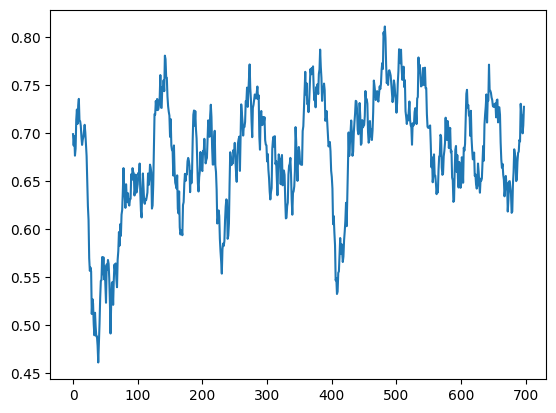

In [100]:
scoresonly = np.array([ float(s['score']) for s in scores ])

smooth = np.convolve(scoresonly, np.ones(20)/20, mode='valid')

plt.plot(smooth)
#plt.plot([ float(s['matches']) for s in scores ])
plt.show()